<a href="https://colab.research.google.com/github/akitim/SkillFactory_projects/blob/main/Project_2_EDA_Timofey_Akimkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка библиотек

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from itertools import combinations
from scipy.stats import ttest_ind
 
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
 
import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.clear
sys.path.append('/content/gdrive/MyDrive/SkillFactory')

/usr/lib/python3.7/threading.py:874: ResourceWarning: unclosed file <_io.FileIO name=79 mode='wb' closefd=True>
  del self._target, self._args, self._kwargs
/usr/lib/python3.7/threading.py:874: ResourceWarning: unclosed file <_io.FileIO name=80 mode='rb' closefd=True>
  del self._target, self._args, self._kwargs


Mounted at /content/gdrive


#Считывание датафрейма из файла

In [161]:
students = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/stud_math.csv')
display(students.sample(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
293,GP,F,17,R,LE3,T,3.0,1.0,services,other,reputation,mother,2.0,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,no,NaN,3.0,1.0,2.0,3.0,6.0,90.0
155,GP,M,15,R,GT3,T,2.0,3.0,at_home,services,course,mother,1.0,2.0,0.0,yes,no,yes,yes,yes,-6.0,yes,NaN,NaN,4.0,4.0,4.0,1.0,2.0,40.0
329,GP,F,17,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,4.0,70.0
352,MS,M,18,U,LE3,T,1.0,3.0,at_home,services,course,mother,1.0,1.0,1.0,no,no,no,no,yes,-3.0,no,yes,yes,4.0,3.0,3.0,3.0,NaN,40.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,-3.0,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
197,GP,M,16,R,LE3,NaN,3.0,3.0,teacher,other,home,father,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,no,3.0,3.0,4.0,3.0,8.0,50.0


#Пользовательские функции

In [213]:
def hasletornum(s):
    ls = [ch for ch in s]
    return any(list(map(lambda x: x.isalnum(), ls)))

# функция принимает датафрейм, выводит value_counts по всем столбцам
# и количество значений NaN в каждом столбце
def counts_info(df):
    for col in df.columns:
        vc = df.loc[:, col].value_counts(dropna=False)
        display(pd.DataFrame(vc))
        if vc[pd.isna(vc.index)].empty:
            msg = f'\nВ столбце {col} не содержится значений NaN\n'
        else:
            nnan = vc[pd.isna(vc.index)].values[0]
            msg = f'\nВ столбце {col} содержится {nnan} значений NaN\n'
        print (msg)
        print ('---------------------------------------------------')

#Предобработка столбцов

In [163]:
#Приведем названия столбцов к однообразному виду
students.columns = map(lambda s: s.replace(', ', '_').lower(),
                            students.columns)
print(students.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')


In [212]:
#проверим, сколько значений  NaN в числовых столбцах
counts_info(students.loc[:, students.loc[4, :].apply(type) != str])

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1



В столбце age не содержится значений NaN

---------------------------------------------------


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3



В столбце medu не содержится значений NaN

---------------------------------------------------


,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1



В столбце fedu не содержится значений NaN

---------------------------------------------------


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7



В столбце traveltime не содержится значений NaN

---------------------------------------------------


,studytime
2.0,194
1.0,103
3.0,64
4.0,27



В столбце studytime не содержится значений NaN

---------------------------------------------------


,failures
0.0,293
1.0,49
2.0,16
3.0,15



В столбце failures не содержится значений NaN

---------------------------------------------------


,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27



В столбце studytime_granular не содержится значений NaN

---------------------------------------------------


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8



В столбце famrel не содержится значений NaN

---------------------------------------------------


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18



В столбце freetime не содержится значений NaN

---------------------------------------------------


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23



В столбце goout не содержится значений NaN

---------------------------------------------------


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43



В столбце health не содержится значений NaN

---------------------------------------------------


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7



В столбце absences не содержится значений NaN

---------------------------------------------------


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16



В столбце score не содержится значений NaN

---------------------------------------------------


In [217]:
#  В столбце fedu одно значение >4 (40), вполне вероятно,
#  что это значение неправильно обработанное значение 4.
#  Заменим это значение на 4:
students.loc[students.loc[:, 'fedu'] == 40, 'fedu'] = 4

#  В столбце famrel одно значение <0 (-1), вполне вероятно,
#  что это значение неправильно обработанное значение 1
#  Заменим это значение на 1:
students.loc[students.loc[:, 'famrel'] == -1, 'famrel'] = 1

Series([], Name: famrel, dtype: float64)

In [172]:
print('\nОбщая характеристика датасета:')
students.info();

print('\nСтатистическая характеристика датасета:')
students.describe()


Общая характеристика датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 n

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.942935,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.903824,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


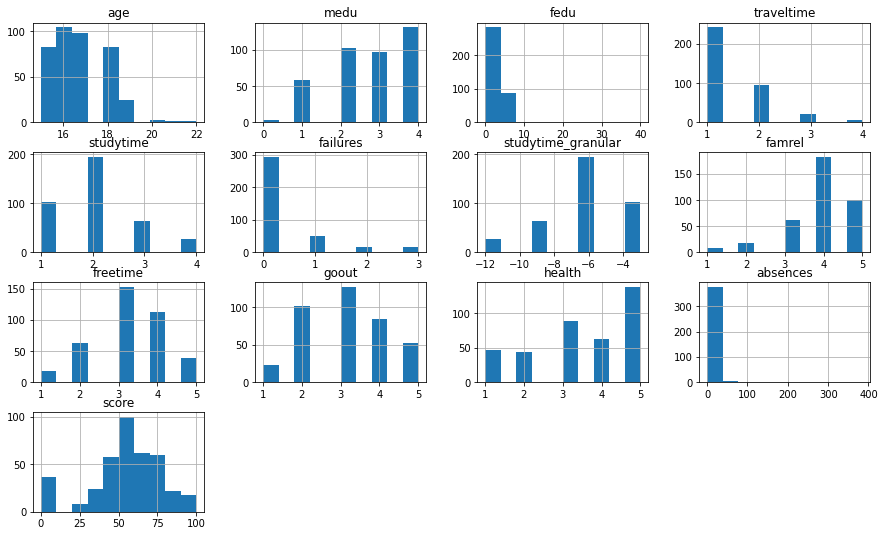

In [173]:
# display(students.loc[:, students.loc[4, :].apply(type) != str])
students.hist(figsize =(15,9));